In [ ]:
# Ho: Latency hasn't changed or is less than that before the switch of isp

# Ha: Latency has gone up after the switch


# True Positive

# low p-value
# Ho is false, latency has gone up
# avg latency after the switch is higher than the average latency before the switch


# False Positive

# low p-value
# Ho is false
# a significant difference found in latency prior to and after
# we found the latency prior was lower than our measured, external factors impact latency
# server crash, downloads, many users etc

# False Negative

# Ho is true 
# high p-value
# we found the latency to be equal, sampling bias, technology, time of day of test

    
# # True Negative
# high p-value
# Ho is true
# Latency has stayed the same or gone down

In [ ]:
# Is the website redesign any good?

# Ho: Traffic has stayed the same or got worse

# Ha: Traffic has statistically increased significantly


# True Positive

# low p-value
# Ho is rejected and false, 
# Traffic has statistically increased significantly



# False Positive

# low p-value
# Ho is rejected and true 
# traffic increased, due to external factors, holiday season


# False Negative

# Ho is accepted
# high p-value
# traffic looked like it stayed the same, sample size

    
# # True Negative
# high p-value
# Ho is true, failed to be rejected
# traffic stayed the same

In [ ]:
# Is our television ad driving more sales?



# Ho: sales have remained the same or went down

# Ha: sales have statistically increased, significantly


# True Positive

# low p-value
# Ho is rejected and false
# sales has statistically increased, significantly



# False Positive

# low p-value
# Ho is rejected and true 
# sales increased, due to external factors


# False Negative

# Ho is accepted
# high p-value
# sales looked like it stayed the same, but they didnt, sample size

    
# # True Negative
# high p-value
# Ho is true, failed to be rejected
# sales stayed the same, tv ad was a flop

In [ ]:
#1.) Ace Realty wants to determine whether the average time 
# it takes to sell homes is different for its two offices.
#  A sample of 40 sales from office #1 revealed a mean of 
# 90 days and a standard deviation of 15 days. 
# A sample of 50 sales from office #2 revealed a mean of 
# 100 days and a standard deviation of 20 days. Use a .05 level of significance.

# H_0: Average time to sell at office 1 == average time to sell at office 2
# H_a: Average time to sell at office 1 != average time to sell at office 2

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [1]:
alpha = 0.05

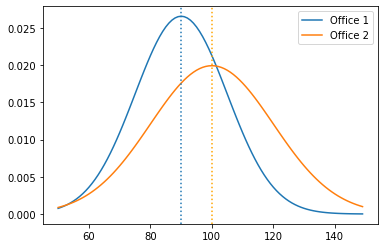

In [3]:
x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color = 'orange')

plt.legend()

In [4]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [5]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


In [7]:
#2.) Load the mpg dataset and use it to answer the following questions:


from pydataset import data
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [8]:
# a.) Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

# H_0: There is no difference in fuel-efficiency in cars from 2008 and 1999
# H_a: There is a difference in fuel-efficiency in cars from 2008 and 1999

mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head()



,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [9]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

<AxesSubplot:>

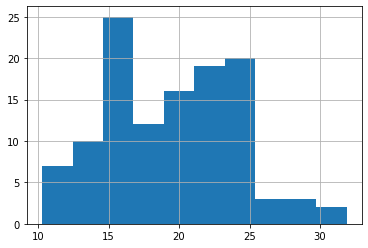

In [10]:
fe_2008.hist()

<AxesSubplot:>

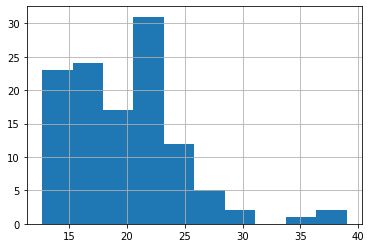

In [11]:
fe_1999.hist()

In [12]:
fe_2008.count()

117

In [13]:
fe_1999.count()

117

In [14]:
fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [15]:
stats.levene(fe_2008, fe_1999)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [16]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p


(-0.3011962975077886, 0.7635345888327115)

In [17]:
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We fail to reject $H_{0}$


In [18]:
#b.) Are compact cars more fuel-efficient than the average car?

# H_0: Compact carts are <= average cars in fuel efficiency
# H_a: Compact carts are > average cars in fuel efficiency

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [20]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [29]:
compact_fe = mpg[mpg['class'] == 'compact'].avg_fe
avgcar_fe = mpg.avg_fe.mean()


In [30]:
t, p = stats.ttest_1samp(compact_fe, avgcar_fe)
t, p

(7.512360093161354, 1.5617666348807674e-09)

In [31]:
if (p/2 < alpha) and t > 0:
    print('Reject null')

Reject null


In [32]:
# c.) Do manual cars get better gas mileage than automatic cars?

# H_0: Manual cars fuel efficiency <= automatic cars fuel efficiency
# H_a: Compact carts are > automatic cars in fuel efficiency

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [42]:
man_fe = mpg[mpg['trans'].str.contains('manual')].avg_fe
auto_fe = mpg[mpg['trans'].str.contains('auto')].avg_fe

In [47]:
stats.levene(man_fe, auto_fe)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [46]:
man_fe.var(), auto_fe.var()

(25.665633639828275, 20.428279095002054)

In [45]:
t, p = stats.ttest_ind(man_fe, auto_fe, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220043e-06)

In [55]:
import pydataset
import seaborn as sns
import env
import pandas as pd

In [52]:
# 1.) Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'

In [53]:
query = '''SELECT *
               FROM customers
               JOIN internet_service_types USING (internet_service_type_id)'''
        

In [57]:
df = pd.read_sql(query, url)
df.head()

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,2,Yes,2,65.6,593.3,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,1,No,2,59.9,542.4,No,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic
3,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,Fiber optic
4,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,Fiber optic


In [59]:
df = df[['tenure', 'monthly_charges', 'total_charges', 'internet_service_type', 'phone_service']]
df.head()

,tenure,monthly_charges,total_charges,internet_service_type,phone_service
0,9,65.6,593.3,DSL,Yes
1,9,59.9,542.4,DSL,Yes
2,4,73.9,280.85,Fiber optic,Yes
3,13,98.0,1237.85,Fiber optic,Yes
4,3,83.9,267.4,Fiber optic,Yes


In [60]:
df.sort_values(by='total_charges').head()

,tenure,monthly_charges,total_charges,internet_service_type,phone_service
2855,0,73.35,,DSL,Yes
3118,0,52.55,,DSL,No
3052,0,25.75,,None,Yes
5433,0,19.85,,None,Yes
1731,0,20.00,,None,Yes


In [62]:
df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tenure                 7043 non-null   int64  
 1   monthly_charges        7043 non-null   float64
 2   total_charges          7032 non-null   float64
 3   internet_service_type  7043 non-null   object 
 4   phone_service          7043 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 275.2+ KB


In [64]:
df = df.dropna()

In [66]:
df.sort_values(by='total_charges').head()

,tenure,monthly_charges,total_charges,internet_service_type,phone_service
2060,1,18.80,18.80,None,Yes
6350,1,18.85,18.85,None,Yes
6560,1,18.85,18.85,None,Yes
7033,1,18.90,18.90,None,Yes
981,1,19.00,19.00,None,Yes


In [ ]:
# H_0 : There is no relationship between tenure and monthly charges
# H_1 : There is a relationship between tenure and monthly charges

<AxesSubplot:xlabel='tenure'>

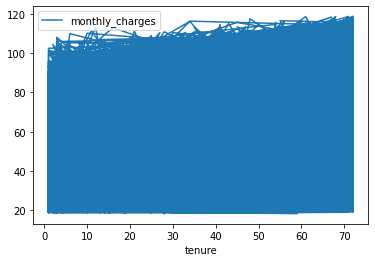

In [70]:
df.plot(y='monthly_charges', x='tenure')

In [71]:
alpha = 0.05

In [85]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)
r, p

(0.2468617666408956, 3.9898213232510553e-98)

In [89]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<AxesSubplot:xlabel='tenure'>

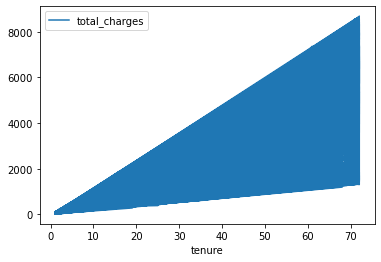

In [86]:
#.) total charges vs tenure
df.plot(y='total_charges', x='tenure')

In [94]:
stats.pearsonr(df.tenure, df.total_charges)


(0.8258804609332071, 0.0)

In [91]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


In [96]:
def correlation_tentotal(df):
    return pd.Series(stats.pearsonr(df.tenure, df.total_charges), index=['r', 'p'])

correlation_tentotal(df)

r    0.82588
p    0.00000
dtype: float64

In [97]:
df.groupby(['internet_service_type', 'phone_service']).apply(correlation_tentotal)

r    p
internet_service_type phone_service               
DSL                   No             0.953423  0.0
                      Yes            0.970533  0.0
Fiber optic           Yes            0.985309  0.0
None                  Yes            0.981465  0.0

In [133]:
#2.) Use the employees database
url2 = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

query2 = '''SELECT * FROM employees JOIN salaries USING (emp_no) WHERE salaries.to_date > NOW()'''




In [134]:
df2 = pd.read_sql(query2, url2)


In [135]:
df2.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [ ]:
# Is there a relationship between how long an employee has been with the company and their salary?

